[View in Colaboratory](https://colab.research.google.com/github/tiensu/DATA_SCIENCE_PJ/blob/master/TF__Linear_Regression.ipynb)

In [0]:
"""Build graph"""

# Import lib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [0]:
# Create data
X_train = np.asarray([3.3, 4.4, 5.5, 6.71, 6.93, 4.168, 9.779, 6.182, 7.59, 2.167,
                      7.042, 10.791, 5.313, 7.997, 5.654, 9.27, 3.1])
Y_train = np.asarray([1.7, 2.76, 2.09, 3.19, 1.694, 1.573, 3.366, 2.596, 2.53, 1.221,
                      2.827, 3.465, 1.65, 2.904, 2.42, 2.94, 1.3])
n_samples = X_train.shape[0] # Lấy số lượng mẫu huấn luyện

In [0]:
# Create two placeholders to store data
X = tf.placeholder(tf.float32, name='X')
Y = tf.placeholder(tf.float32, name='Y')

In [0]:
# Create two variables to store weight and bias
w = tf.get_variable('weight', initializer=tf.constant(0.0))
b = tf.get_variable('bias', initializer=tf.constant(0.0))

In [0]:
# Predict model
Y_pred = w * X + b

In [0]:
# Loss function
loss = tf.square(Y - Y_pred, name='loss')

In [0]:
# Optimization funtion
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss)

In [0]:
#writer = tf.summary.FileWriter('')
writer.close()

In [32]:
"""Run the graph"""
with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  for i in range(100):
    total_loss = 0
    for x, y in zip(X_train, Y_train):
      _, _loss = sess.run([optimizer, loss], feed_dict={X: x, Y: y})
      total_loss += _loss
    #print('Epoch {0}: {1}'.format(i, total_loss/n_samples))
  w_out, b_out = sess.run([w, b]) # Get weight and bias value
  print(w_out, b_out)

0.31187806 0.31304958


In [0]:
# Predicted value
Y_pred = X_train * w_out + b_out

In [36]:
# Compare predicted value and real value
for i, j in zip(Y_pred, Y_train):
  print(i, '|', j)

1.3422471672296523 | 1.7
1.6853130280971529 | 2.76
2.028378888964653 | 2.09
2.4057513359189033 | 3.19
2.4743645080924033 | 1.694
1.6129573192596436 | 1.573
3.3629050877392292 | 3.366
2.241079722702503 | 2.596
2.6802040246129035 | 2.53
0.988889330536127 | 1.221
2.5092948502898214 | 2.827
3.6785256797373296 | 3.465
1.9700576926171778 | 1.65
2.8071383931338785 | 2.904
2.076408109486103 | 2.42
3.2041591575741766 | 2.94
1.2798715561628342 | 1.3


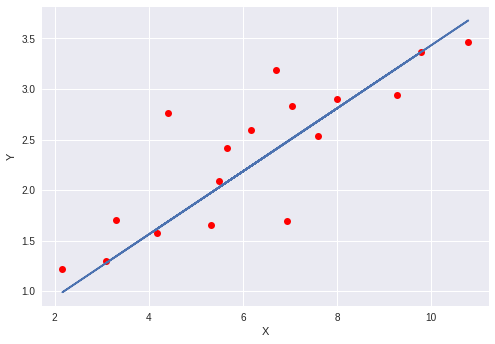

In [38]:
# Plot
plt.plot(X_train, Y_train, 'ro', X_train, Y_pred)
#plt.axis([140, 190, 45, 75])
plt.xlabel('X')
plt.ylabel('Y')
plt.show()